# Explore here

In [125]:
import pandas as pd

data_diab = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [126]:
data_diab.shape

(768, 9)

In [127]:
data_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Existen un total de 768 filas  y 9 columnas, de entre las que encontramos el objetivo o clase a predecir, Outcome                   .
Ninguna variable cuenta con valores nulos.
Los datos cuentan con 9 características numéricas.

Eliminar duplicados

In [128]:
data_diab.drop("Outcome", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado.

Análisis de variables univariante
Análisis sobre variables numéricas

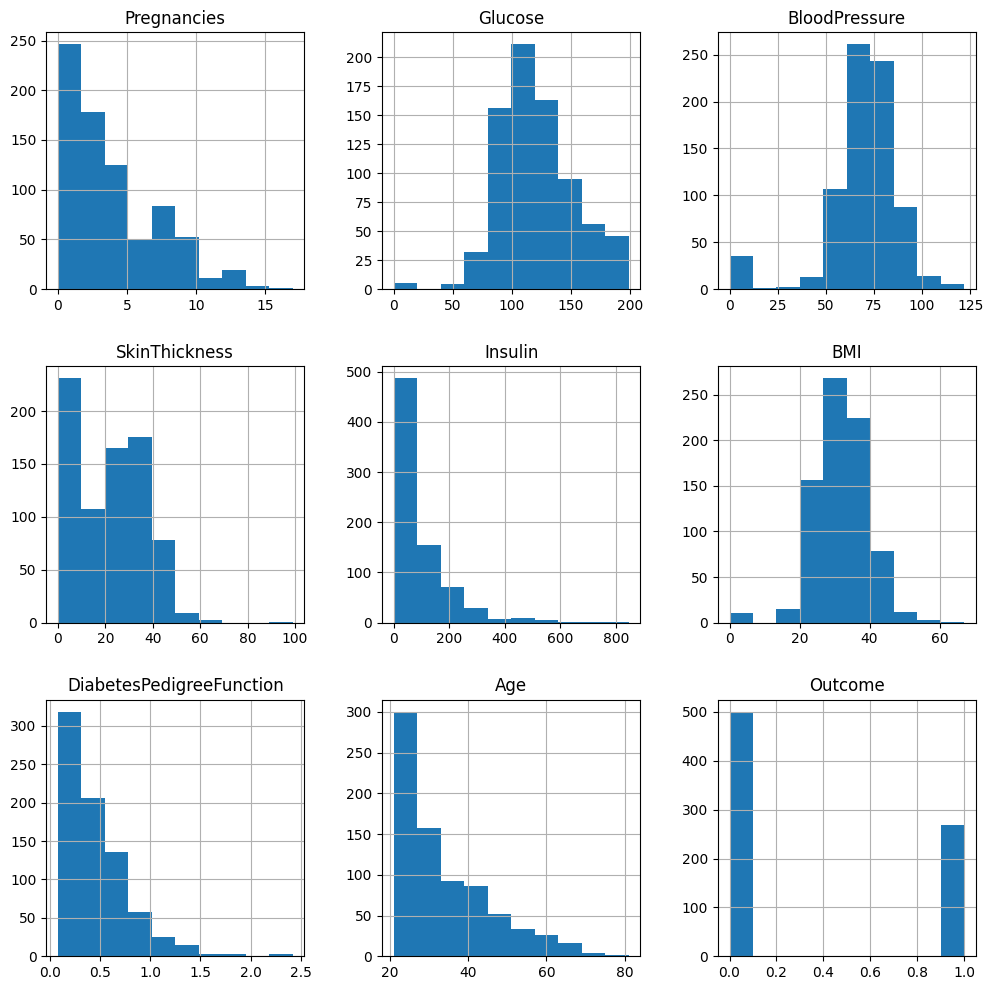

In [129]:
import matplotlib.pyplot as plt 

data_diab.hist(figsize=(12,12))
plt.show()

Pregnancies: entre 0 y 1 sus valores ascienden a 250 para luego ir descendiendo de manera positiva.
Glucose: entre 100 y 120 aproximadamente asciende a 250 y luego se distribuye en ambos lados a la izquierda con valores menores que en la cola positiva o de la derecha.
BloodPressure: presenta valores elevados entre 60 y 90 y se distruye de manera uniforme hacia ambos lados.
SkinThickness: valores elevados entre 0 y 10 y entre 20 y 40, el resto de la distribucion es variable.
Insulin: entre 0 y 10 asciende a 500 y de 10 a 800 va descendiendo en forma positiva.
BMI: entre 30 y 40 los valores ascienden a 250-300, luego se distribuyen de manera uniforme hacia ambos lados.
DiabetesPedigreeFunction: toma su valor mas alto en 300 entre 0.0 y 0.3 luego va descendiendo de forma positiva para el resto de los valores hasta 2.5.
Age: asciende a 300 entre 20 y 30 y luego va descendiendo de forma positiva para el resto de los valores.
Outcome: entre 0.0 y 0.1 asciende a 500 y entre 0.7 y 1.0 asciende a 280 aproximadamente
                                          

Análisis de variables multivariante
Análisis numérico-numérico

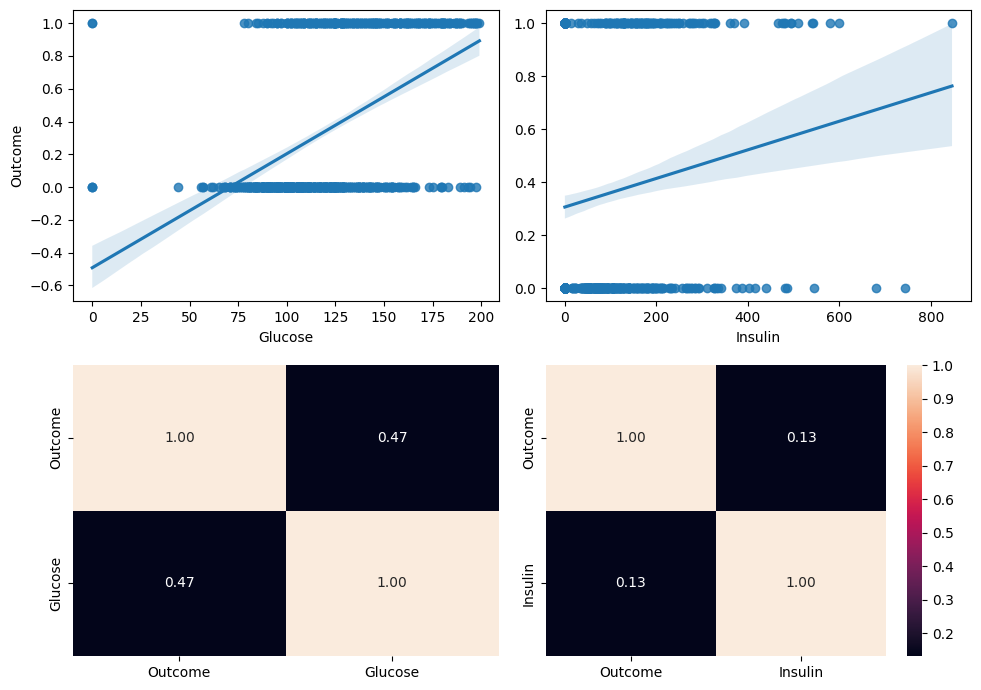

In [130]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_diab, x = "Glucose", y = "Outcome")
sns.heatmap(data_diab[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_diab, x = "Insulin", y = "Outcome").set(ylabel=None)
sns.heatmap(data_diab[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Outcome vs Glucose: a medida que aumenta la glucosa, la probabilidad de que Outcome sea 1 también aumenta. - La zona azul clara alrededor de la línea. Hay una relación positiva entre glucosa y Outcome. Niveles más altos de glucosa están asociados con una mayor probabilidad de que Outcome sea 1. Mientras que el diagrama de correlacion nos muestra un valor de 0.47 entre Outcome y Glucose.
Outcome vs Insulin: Hay una relación positiva entre insulina y Outcome, pero es más débil y menos segura que la relación con glucosa. Mientra que el diagrama de correlacion nos muestra un valor de 0.13 para Outcome vs Insulin.
Ambos gráficos sugieren que a medida que aumentan los niveles de glucosa o insulina, la probabilidad de que Outcome sea 1 aumenta. - La relación con glucosa parece más fuerte y más clara que con insulina. - Esto puede indicar que la glucosa es un mejor predictor del Outcome en este conjunto de datos. 


Análisis de correlaciones


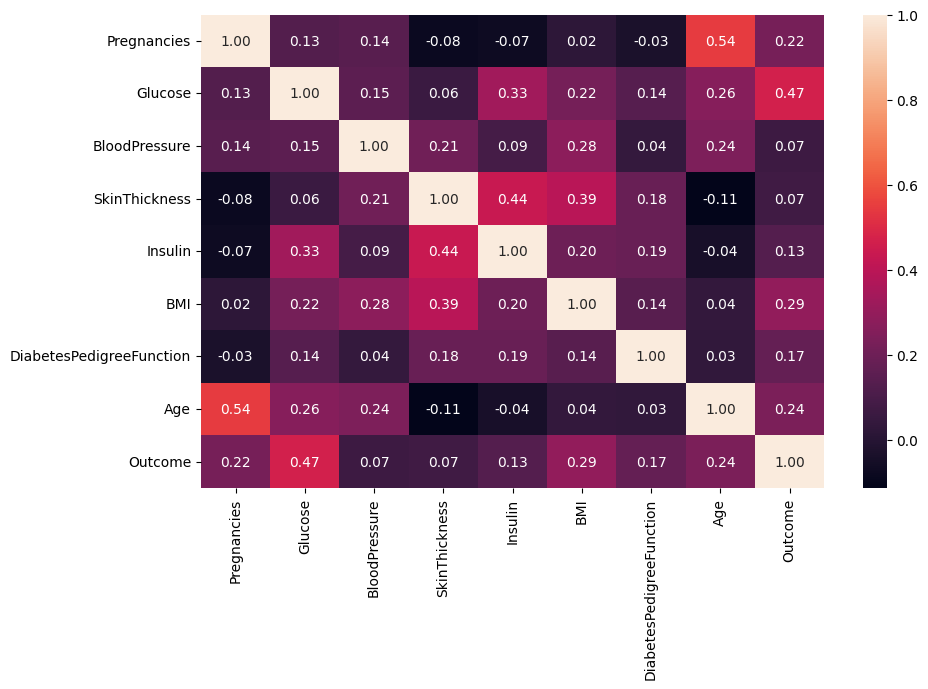

In [131]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data_diab[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La correlacion mas importante que podemos destacar es entre Outcome y Glucose con un valor de 0.47, tambien podemos destacar la correlacion entre SkinThickness e Insulin con un valor de 0.44, o esta misma variable con BMI presentando un valor de 0.39 y con BloodPressure de 0.21. Por otro lado la variable age presenta una correlacion de 0.24 con la variable objetivo en este caso Outcome y 0.54 con Pregnancies. Estos son los valores mas significativos que presenta el diagrama, el resto de valores no preentan significancia al analisis.

Análisis de outliers

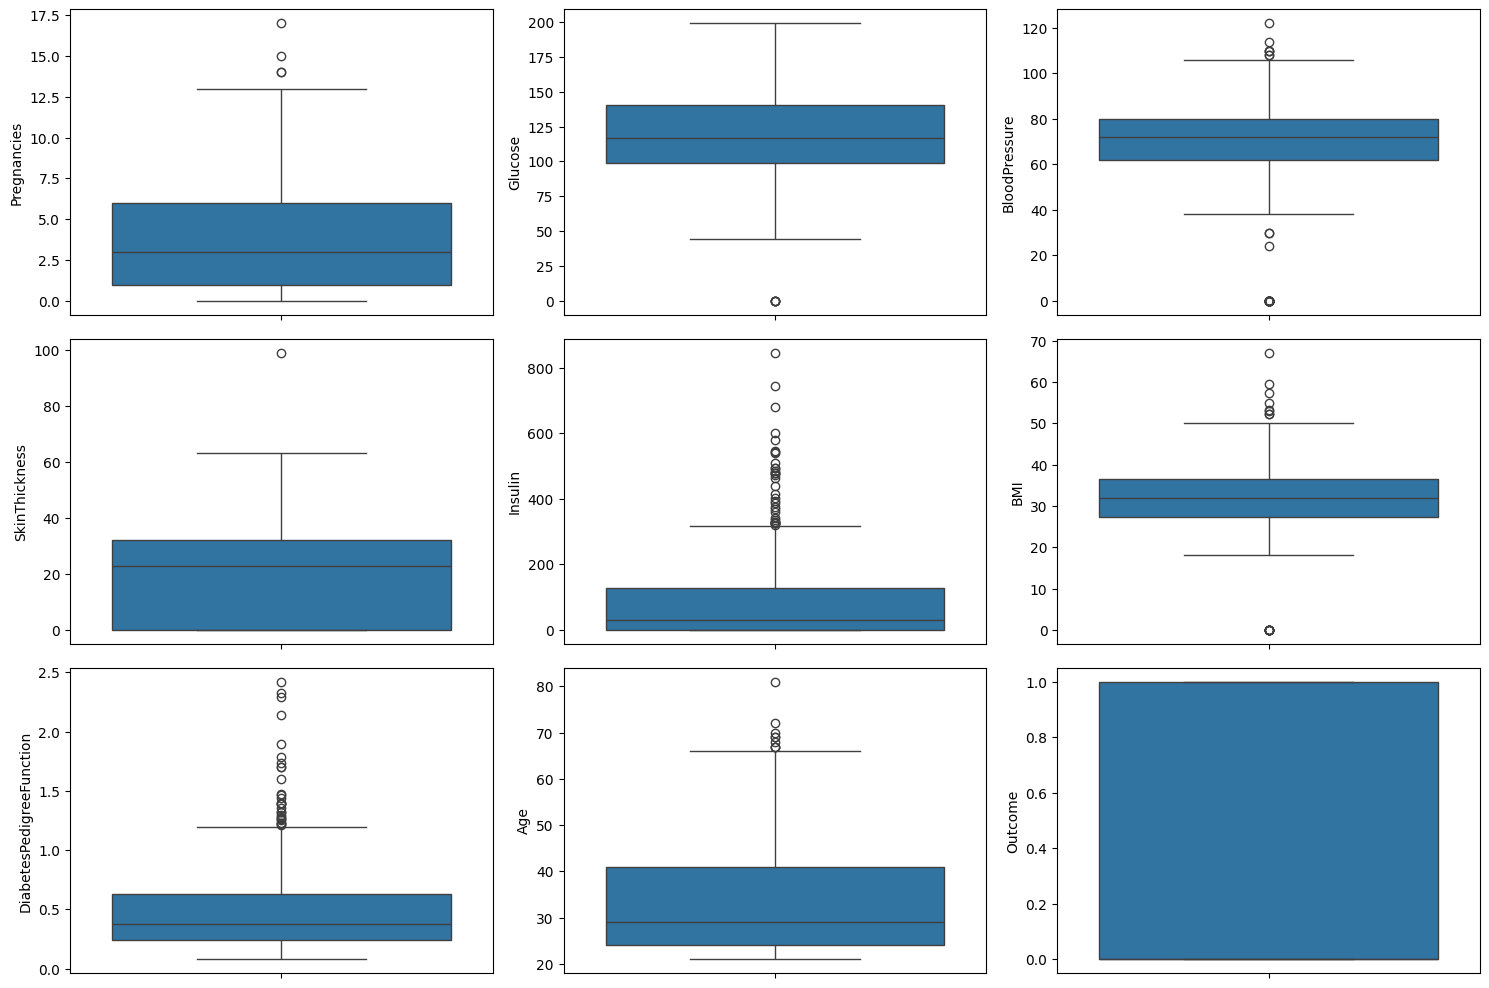

In [132]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_diab, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = data_diab, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = data_diab, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = data_diab, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = data_diab, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = data_diab, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = data_diab, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 1], data = data_diab, y = "Age")
sns.boxplot(ax = axis[2, 2], data = data_diab, y = "Outcome")

plt.tight_layout()

plt.show()

Vamos a evaluar la eliminacion de los outlier de la variable Insulin 

In [133]:
Insulin_stats = data_diab["Insulin"].describe()
Insulin_stats

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [134]:
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit = Insulin_stats["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] - 1.5 * Insulin_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(Insulin_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 318.12 y -190.88, con un rango intercuartílico de 127.25


In [135]:
data_diab[data_diab["Insulin"] > 300]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
56,7,187,68,39,304,37.7,0.254,41,1
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
199,4,148,60,27,318,30.9,0.150,29,1
220,0,177,60,29,478,34.6,1.072,21,1


En este caso vemos que la mayoria de los casos representa un outcome de 1 , es decir con Diabetes positivo por lo tanto no nos convendria eliminar los outliers y los pocos casos que son negativos no representan valores en Insulin muy superiores a 300.

Análisis de valores faltantes

In [136]:
data_diab.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no hay faltantes

Escalado de valores

In [137]:
data_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Dividimos el conjunto de datos en muestras de train y test
X = data_diab.drop("Outcome", axis = 1)[num_variables]
y = data_diab["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


Normalización

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


Escalado Mínimo-Máximo

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
346,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


Selección de características

In [141]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.304,21.0
1,9.0,112.0,28.2,1.282,50.0
2,1.0,139.0,28.7,0.654,22.0
3,0.0,161.0,21.9,0.254,65.0
4,6.0,134.0,46.2,0.238,46.0


In [142]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [143]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 60 to 102
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


In [144]:
X_test_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,34.0,0.430,43.0
1,2.0,112.0,35.7,0.148,21.0
2,2.0,108.0,30.8,0.158,21.0
3,8.0,107.0,24.6,0.856,34.0
4,7.0,136.0,29.9,0.210,50.0


In [145]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

In [146]:
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BMI                       614 non-null    float64
 3   DiabetesPedigreeFunction  614 non-null    float64
 4   Age                       614 non-null    float64
 5   Outcome                   614 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 28.9 KB


In [147]:
X_train_sel.to_csv("/workspaces/Arboles_decision/data/processed/diabetes_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Arboles_decision/data/processed/diabetes_test.csv", index=False)

ARBOLES PARA CLASIFICACION

Lectura del conjunto de datos procesado

In [148]:

import pandas as pd

train_data = pd.read_csv("/workspaces/Arboles_decision/data/processed/diabetes_train.csv")
test_data = pd.read_csv("/workspaces/Arboles_decision/data/processed/diabetes_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.304,21.0,0
1,9.0,112.0,28.2,1.282,50.0,1
2,1.0,139.0,28.7,0.654,22.0,0
3,0.0,161.0,21.9,0.254,65.0,0
4,6.0,134.0,46.2,0.238,46.0,1


In [149]:
train_data.shape

(614, 6)

In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [163]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [164]:
print(X_train.shape)

(614, 5)


In [165]:
X_train

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.304,21.0
1,9.0,112.0,28.2,1.282,50.0
2,1.0,139.0,28.7,0.654,22.0
3,0.0,161.0,21.9,0.254,65.0
4,6.0,134.0,46.2,0.238,46.0
...,...,...,...,...,...
609,5.0,139.0,28.6,0.411,26.0
610,1.0,96.0,22.4,0.207,27.0
611,10.0,101.0,45.6,1.136,38.0
612,0.0,141.0,42.4,0.205,29.0


In [166]:
X_train


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.304,21.0
1,9.0,112.0,28.2,1.282,50.0
2,1.0,139.0,28.7,0.654,22.0
3,0.0,161.0,21.9,0.254,65.0
4,6.0,134.0,46.2,0.238,46.0
...,...,...,...,...,...
609,5.0,139.0,28.6,0.411,26.0
610,1.0,96.0,22.4,0.207,27.0
611,10.0,101.0,45.6,1.136,38.0
612,0.0,141.0,42.4,0.205,29.0


In [155]:
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Outcome, dtype: int64

<Axes: >

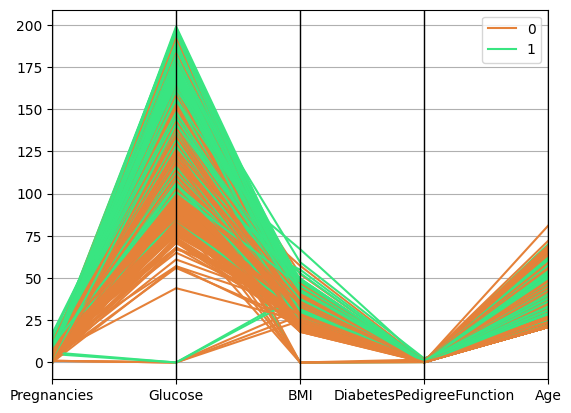

In [156]:
total_data = X_train
total_data["Outcome"] = y_train
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

Las líneas de ambos grupos (0 y 1) muestran picos en diferentes variables, lo que sugiere que ciertas características son más comunes en uno de los grupos.
Las variaciones en los picos y en las distribuciones indican posibles correlaciones entre las variables analizadas y la presencia o ausencia de diabetes.
Por ejemplo, se puede observar que los niveles de glucosa y el índice de masa corporal tienden a ser más altos en la categoría 1.


In [167]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
import numpy as np
X_test = np.array(X_test)
    

In [159]:
print(X_train.shape)
print(X_test.shape)

(614, 6)
(154, 5)


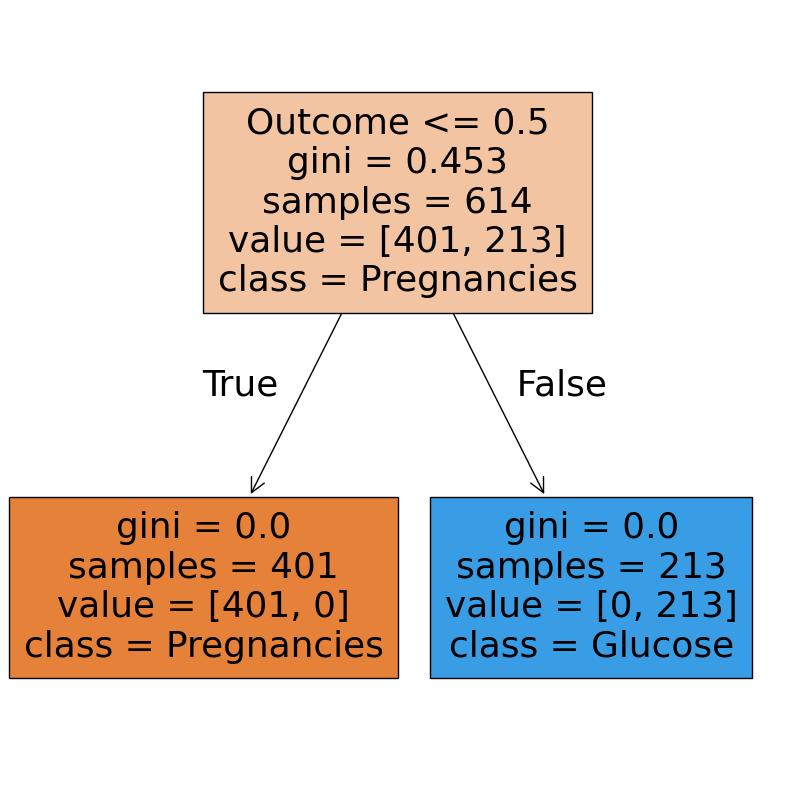

In [160]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,10))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction", "Age"], filled = True)

plt.show()

In [170]:
print(X_train.shape)
print(X_test.shape)

(614, 5)
(154, 5)


In [169]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [173]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_pred)

0.7207792207792207

El modelo se esta comportando a un 72% quiere decir que ese es el porcentaje de aciertos que tiene en cuanto al diagnostico de diabetes.

In [174]:
### Profundidad del árbol
model.get_depth()

14

In [175]:
### Número de hojas
model.get_n_leaves()

np.int64(117)

In [176]:
# Optimización de la profundidad del árbol, con el fin de elegir un hiperpárametro que mejore el modelo con el
lista_treer_train = []
lista_treer_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for item in max_depths:

    model_tree = DecisionTreeClassifier(max_depth = item)

    model_tree.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = model_tree.predict(X_train)
    train_tree_ac = accuracy_score(y_train, y_train_pred)


    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = model_tree.predict(X_test)
    test_tree_ac = accuracy_score(y_test, y_test_pred)

    # Agregar la información a las listas
    lista_treer_train.append(train_tree_ac)
    lista_treer_test.append(test_tree_ac)

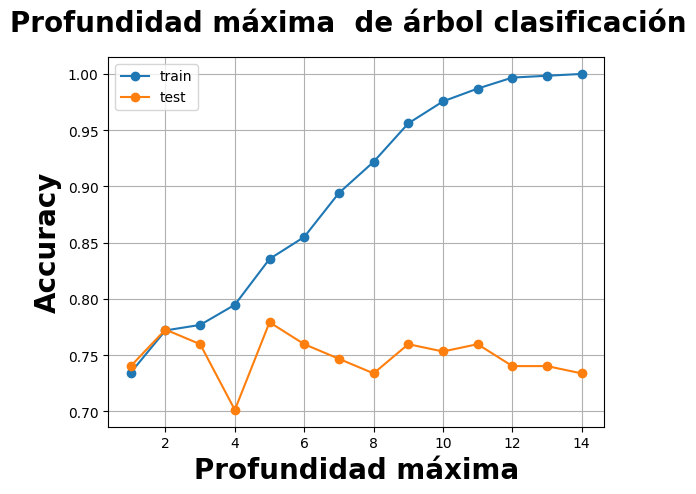

In [177]:
### Gráfico
import matplotlib.pyplot as plt
plt.suptitle('Profundidad máxima  de árbol clasificación' , fontweight = 'black', fontsize=20)
plt.plot(max_depths,lista_treer_train,'o-',label='train' )
plt.plot(max_depths,lista_treer_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Profundidad máxima',fontsize=20,fontweight = 'black')
plt.ylabel('Accuracy',fontsize=20,fontweight = 'black');

El grafico muestra que en una profundidad de 2 ya el modelo esta optimizado en Train y en Test, seria la profundidad maxima donde el accuracy no incurra en overfitting.

In [178]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

ARBOLES PARA REGRESION

In [179]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [180]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0.])

In [181]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.2662337662337662


In [182]:
import numpy as np
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Raíz del Error cuadrático medio: 0.515978455203089


In [183]:
from sklearn.metrics import r2_score
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Coeficiente de determinación: -0.15959595959595996


In [197]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_pred)

0.7207792207792207

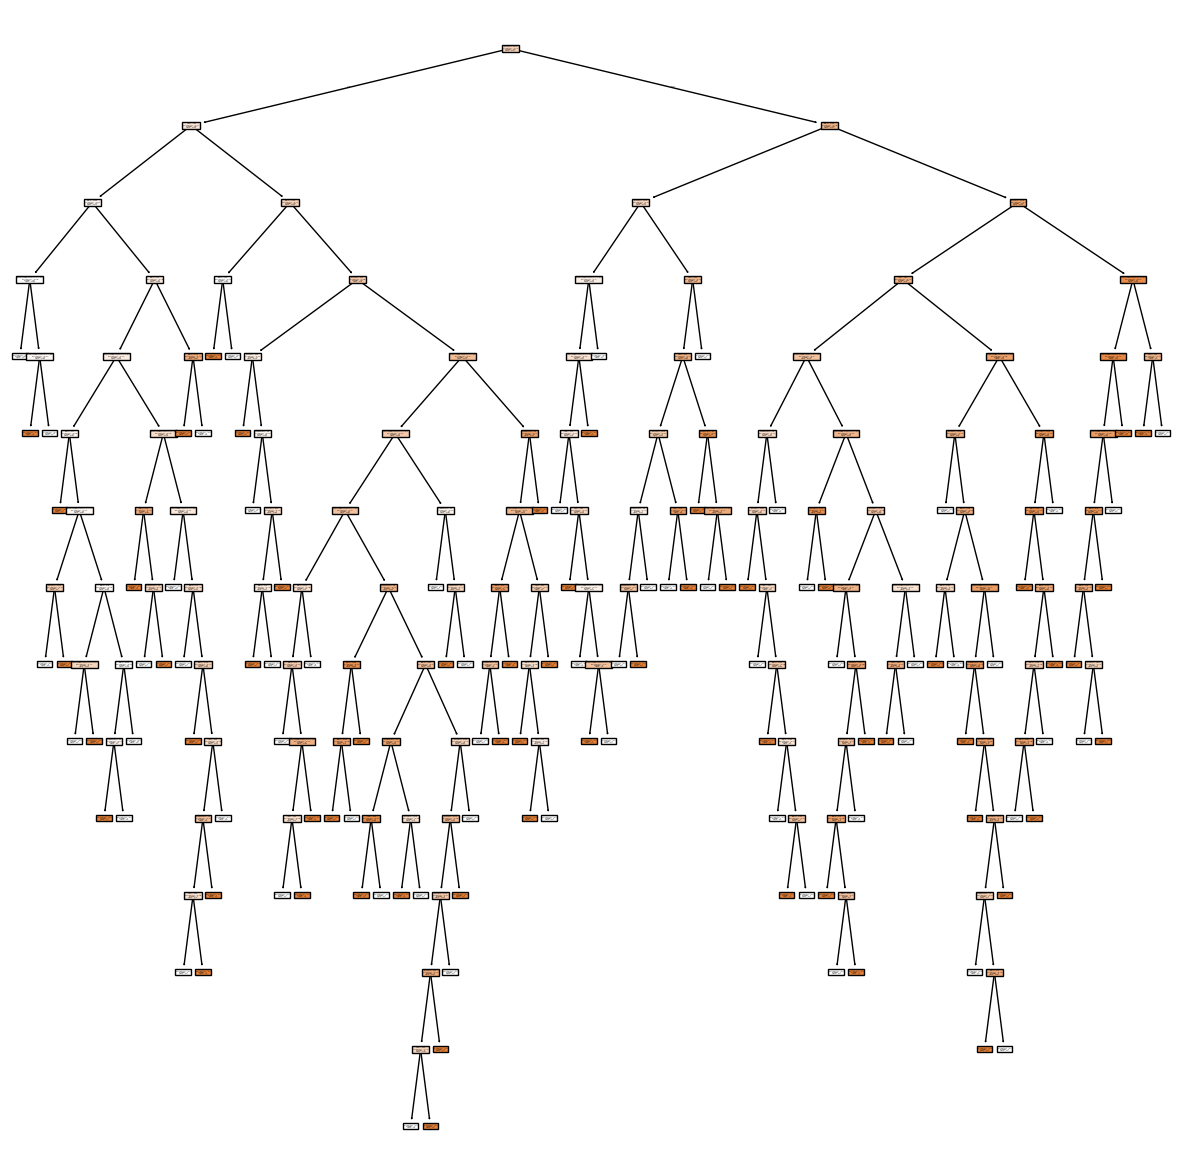

In [184]:
# Visual
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)

plt.show()

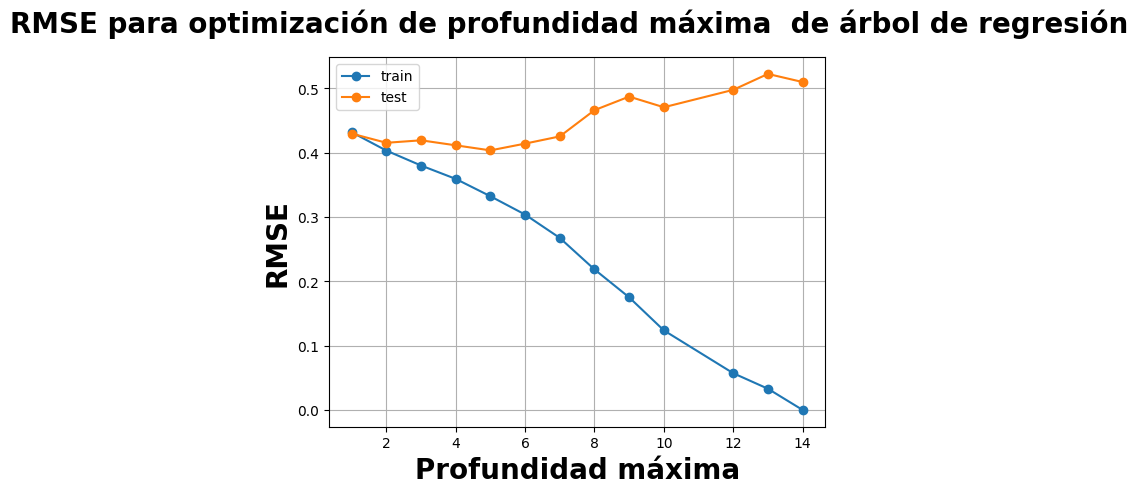

In [187]:
# Optimización de la profundidad del árbol, con el fin de elegir un hiperpárametro que mejore el modelo con el rmse
lista_treemse_train = []
lista_treemse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,12,13,14]

for item in max_depths:

    model_tree = DecisionTreeRegressor(max_depth = item)

    model_tree.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = model_tree.predict(X_train)
    train_tree_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = model_tree.predict(X_test)
    test_tree_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Agregar la información a las listas
    lista_treemse_train.append(train_tree_rmse)
    lista_treemse_test.append(test_tree_rmse)

plt.suptitle('RMSE para optimización de profundidad máxima  de árbol de regresión' , fontweight = 'black', fontsize=20)
plt.plot(max_depths,lista_treemse_train,'o-',label='train' )
plt.plot(max_depths,lista_treemse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Profundidad máxima',fontsize=20,fontweight = 'black')
plt.ylabel('RMSE',fontsize=20,fontweight = 'black');

Aca tambien podemos ver que la profundidad maxima optima es 2. A mayor profundidad el modelo tiende a sobreajustarse.

In [189]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [190]:
# Parámetros

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

tree_grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [191]:
## Mejores Parámetros
tree_grid.best_params_

{'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [193]:
model_final = tree_grid.best_estimator_

In [194]:
##Pred
y_pred_dt = model_final.predict(X_test)
y_pred_dt

array([0.42962963, 0.16494845, 0.00806452, 0.02941176, 0.13888889,
       0.42962963, 0.00806452, 0.42962963, 0.62962963, 0.62962963,
       0.42962963, 0.90909091, 0.62962963, 0.42962963, 0.00806452,
       0.16494845, 0.16494845, 0.00806452, 0.56      , 0.62962963,
       0.42962963, 0.42962963, 0.42962963, 0.16494845, 0.62962963,
       0.90909091, 0.00806452, 0.00806452, 0.16494845, 0.42962963,
       0.62962963, 0.62962963, 0.90909091, 0.90909091, 0.42962963,
       0.62962963, 0.90909091, 0.42962963, 0.42962963, 0.62962963,
       0.00806452, 0.13888889, 0.42962963, 0.42962963, 0.00806452,
       0.62962963, 0.42962963, 0.16494845, 0.02941176, 0.90909091,
       0.00806452, 0.62962963, 0.62962963, 0.13888889, 0.13888889,
       0.00806452, 0.56      , 0.00806452, 0.16494845, 0.90909091,
       0.62962963, 0.16494845, 0.13888889, 0.42962963, 0.16494845,
       0.62962963, 0.00806452, 0.62962963, 0.00806452, 0.90909091,
       0.62962963, 0.42962963, 0.02941176, 0.16494845, 0.02941

In [195]:
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_dt))}')

RMSE:0.4190440597820104


In [196]:
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_dt)}")

Coeficiente de determinación: 0.23517348640970048


In [198]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_pred)

0.7207792207792207

In [199]:
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_dt))}')

RMSE:0.4190440597820104


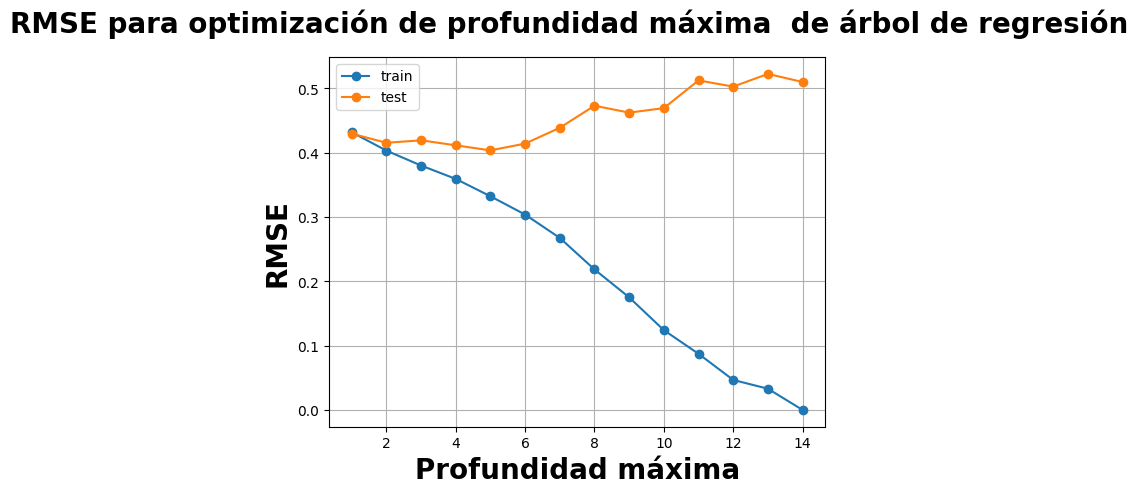

In [200]:
# Optimización de la profundidad del árbol, con el fin de elegir un hiperpárametro que mejore el modelo con el rmse
lista_treermse_train = []
lista_treermse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for item in max_depths:

    model_tree = DecisionTreeRegressor(max_depth = item)

    model_tree.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = model_tree.predict(X_train)
    train_tree_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = model_tree.predict(X_test)
    test_tree_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Agregar la información a las listas
    lista_treermse_train.append(train_tree_rmse)
    lista_treermse_test.append(test_tree_rmse)

plt.suptitle('RMSE para optimización de profundidad máxima  de árbol de regresión' , fontweight = 'black', fontsize=20)
plt.plot(max_depths,lista_treermse_train,'o-',label='train' )
plt.plot(max_depths,lista_treermse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Profundidad máxima',fontsize=20,fontweight = 'black')
plt.ylabel('RMSE',fontsize=20,fontweight = 'black');

Nuevamente como profundidad maxima al modelo se lo prodria dejar en 2 antes de que entre en overfitting. 